In [37]:
 import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set()

In [38]:
train=pd.read_csv('data.csv')

In [39]:
pd.set_option("display.max_rows", None, "display.max_columns", None)

In [40]:
#train

In [41]:
year= train["Year"]

In [42]:
manual=train[train["Transmission Type"]=="MANUAL"]
manual=manual["Transmission Type"]
manual.describe()

count       2935
unique         1
top       MANUAL
freq        2935
Name: Transmission Type, dtype: object

In [43]:
unknown=train[train["Transmission Type"]=="UNKNOWN"]
#unknown

In [44]:
duplicates=pd.concat([manual,unknown],axis = 0)
automatic=train.drop(duplicates.index)
automatic=automatic["Transmission Type"]
automatic.describe()

count          8960
unique            3
top       AUTOMATIC
freq           8266
Name: Transmission Type, dtype: object

In [45]:
msrp=pd.DataFrame(train['MSRP'])

In [46]:
msrp.describe()

,MSRP
count,1.191400e+04
mean,4.059474e+04
std,6.010910e+04
min,2.000000e+03
25%,2.100000e+04
50%,2.999500e+04
75%,4.223125e+04
max,2.065902e+06


In [47]:
pop=pd.DataFrame(train['Popularity'])

In [48]:
make = train["Make"]
make=make.astype("category")
#make.value_counts()

In [49]:
#make_filtered.value_counts()

In [50]:
#make_filtered2.value_counts()

In [51]:
jointDF = pd.concat([msrp,make],axis = 1).reindex(msrp.index)
#jointDF

In [52]:
filtered=train[train["MSRP"]==2000]
filtered.corr()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.082992,-0.142845,0.132175,0.239447,0.215642,0.003462,NaN
Engine HP,0.082992,1.000000,0.708591,0.118334,-0.601932,-0.721180,-0.070871,NaN
Engine Cylinders,-0.142845,0.708591,1.000000,0.001565,-0.652739,-0.726870,0.127867,NaN
Number of Doors,0.132175,0.118334,0.001565,1.000000,0.045652,-0.043404,-0.044905,NaN
highway MPG,0.239447,-0.601932,-0.652739,0.045652,1.000000,0.935552,-0.082751,NaN
city mpg,0.215642,-0.721180,-0.726870,-0.043404,0.935552,1.000000,-0.049168,NaN
Popularity,0.003462,-0.070871,0.127867,-0.044905,-0.082751,-0.049168,1.000000,NaN
MSRP,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Graphical representation for the msrp=2000 data

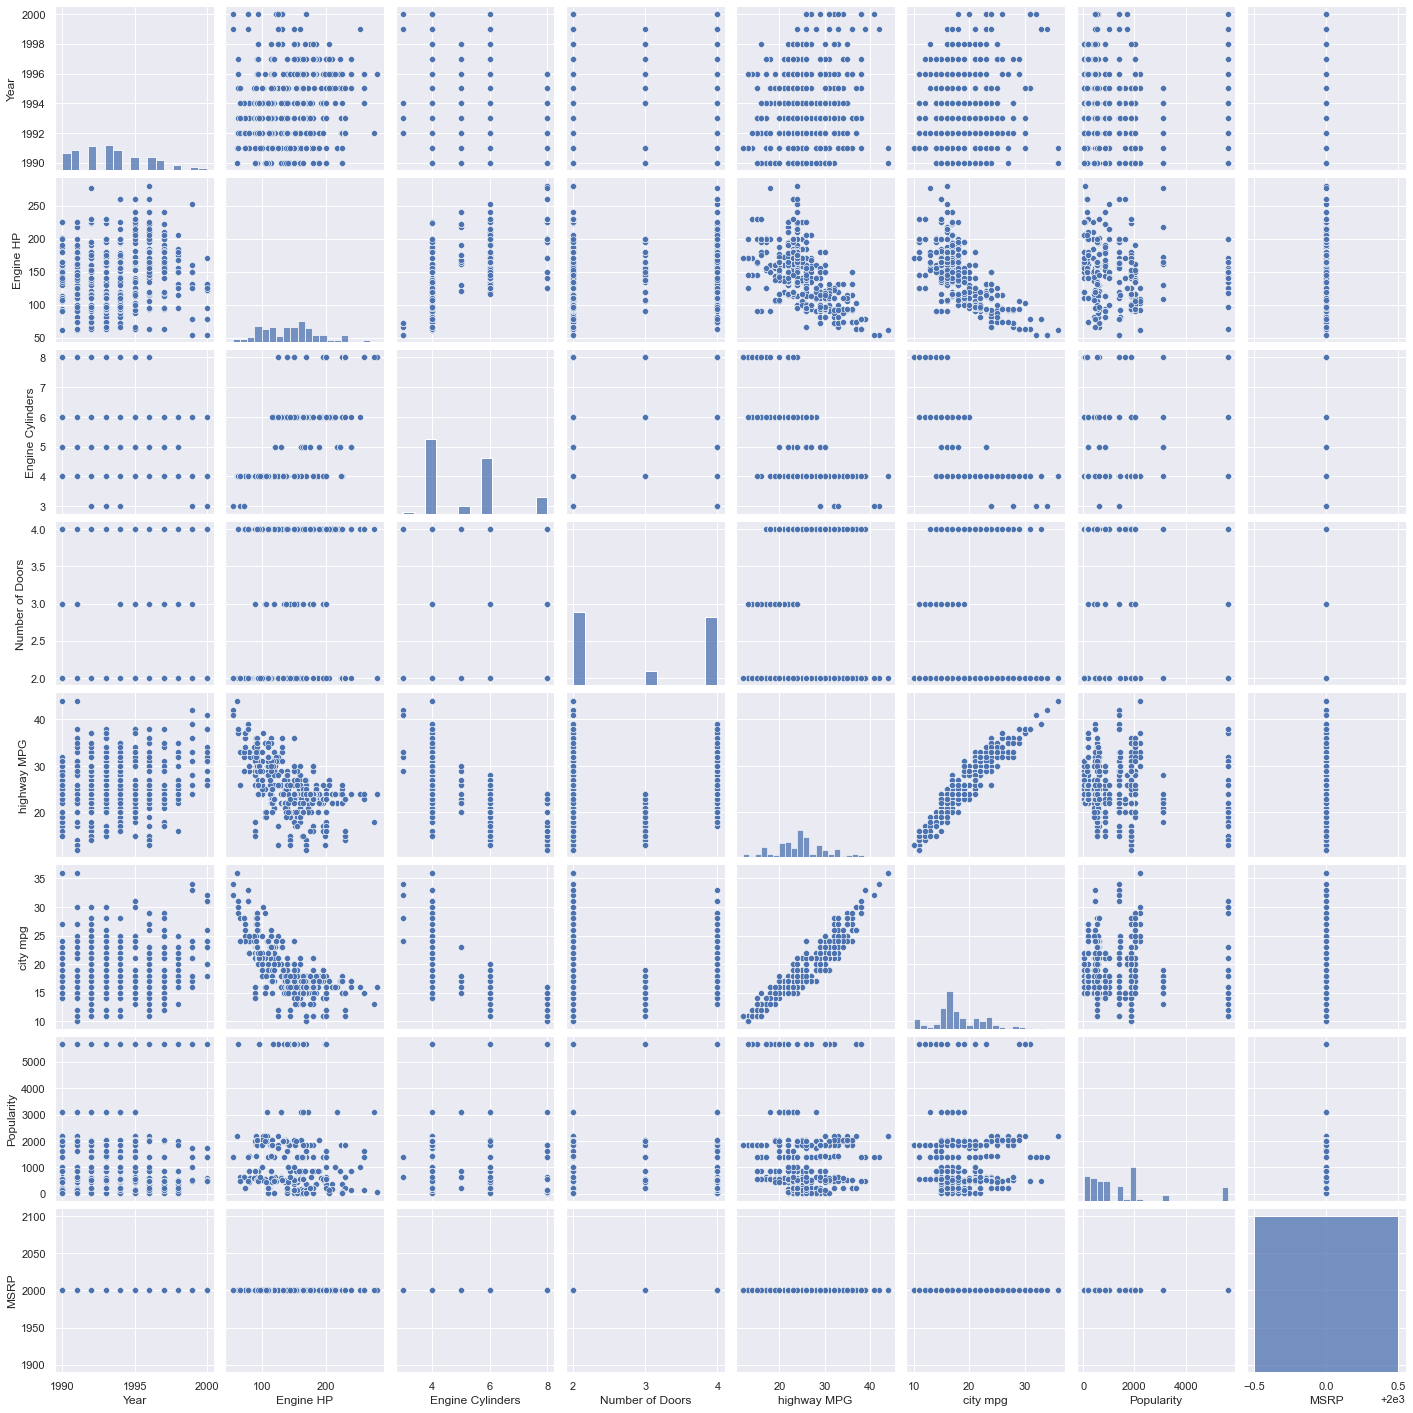

In [53]:
sb.pairplot(data = filtered)

In [54]:
#duplicates=pd.merge(train,filtered)
train_filtered=train.drop(filtered.index)
train_filtered.shape

(10878, 16)

In [55]:
make_filtered=pd.DataFrame(train_filtered["Make"])
make_filtered=make_filtered.astype("category")

#make_filtered.value_counts()

In [56]:
msrp_filtered=pd.DataFrame(train_filtered["MSRP"])
jointDF3 = pd.concat([msrp_filtered,make_filtered],axis = 1).reindex(msrp_filtered.index)


In [57]:
#jointDF["MSRP"].describe()

In [58]:
#jointDF3["MSRP"].describe()

In [59]:
#jointDF4["MSRP"].describe()

In [60]:
filtered2=train[train["MSRP"]<=10000]
train_filtered2=train.drop(filtered2.index)
#train_filtered.shape
msrp_filtered2=pd.DataFrame(train_filtered2["MSRP"])
make_filtered2=pd.DataFrame(train_filtered2["Make"])
make_filtered2=make_filtered2.astype("category")
jointDF4 = pd.concat([msrp_filtered2,make_filtered2],axis = 1).reindex(msrp_filtered2.index)
filtered2.corr()


,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
Year,1.000000,0.276673,0.100355,0.063776,-0.019274,-0.024254,0.050143,0.362012
Engine HP,0.276673,1.000000,0.749000,-0.000094,-0.572446,-0.678374,0.055128,0.505197
Engine Cylinders,0.100355,0.749000,1.000000,-0.025426,-0.660333,-0.733777,0.228282,0.339988
Number of Doors,0.063776,-0.000094,-0.025426,1.000000,0.091020,0.016781,-0.135181,-0.171086
highway MPG,-0.019274,-0.572446,-0.660333,0.091020,1.000000,0.936153,-0.182349,-0.204993
city mpg,-0.024254,-0.678374,-0.733777,0.016781,0.936153,1.000000,-0.152914,-0.213934
Popularity,0.050143,0.055128,0.228282,-0.135181,-0.182349,-0.152914,1.000000,0.091092
MSRP,0.362012,0.505197,0.339988,-0.171086,-0.204993,-0.213934,0.091092,1.000000


In [61]:
filtered2["Year"].value_counts()

1993    209
1992    177
1997    171
1994    162
1991    152
1998    152
1995    134
1996    129
1990    123
1999    119
2000    117
2001      2
Name: Year, dtype: int64

In [62]:
filtered["Year"].value_counts()

1993    171
1992    161
1991    137
1994    134
1990    117
1995     91
1996     90
1997     68
1998     32
1999     20
2000     15
Name: Year, dtype: int64

Plot of the count of Make from original data set

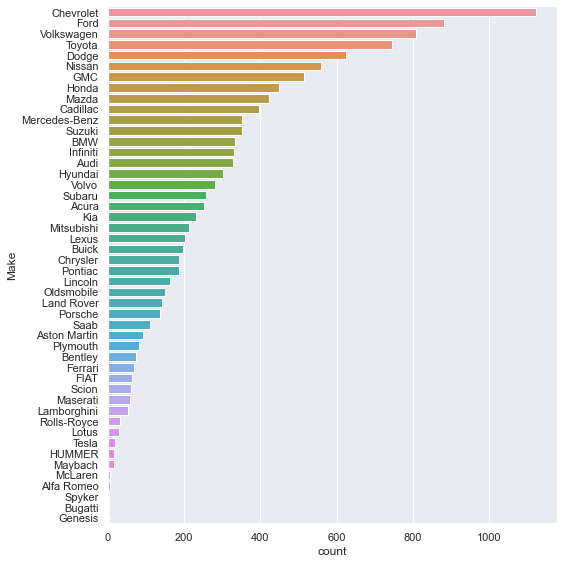

In [63]:
make=pd.DataFrame(train['Make'])
sb.catplot(y = 'Make', data = jointDF, 
           kind = "count", 
           height = 8, 
           order = jointDF['Make'].value_counts().index)

Plot of the count of Make data after filtering out the MSRP 2000 data

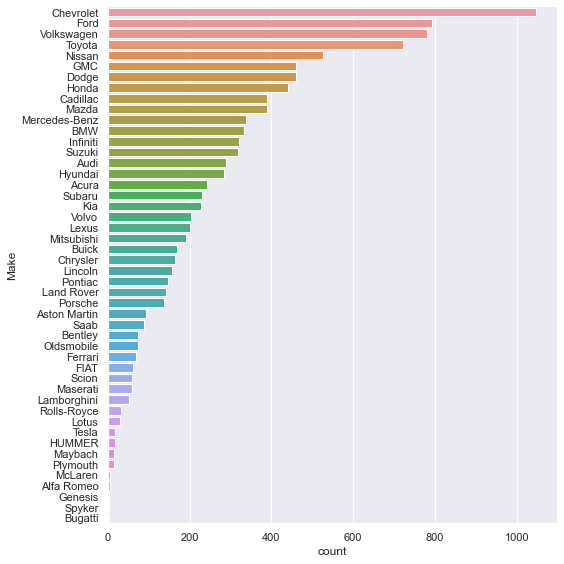

In [64]:
sb.catplot(y = 'Make', data = jointDF3, 
           kind = "count", 
           height = 8, 
           order = jointDF3['Make'].value_counts().index)

Plot of the count of Make data after filtering the MSRP in the range of above 2000 and less equal to 10000

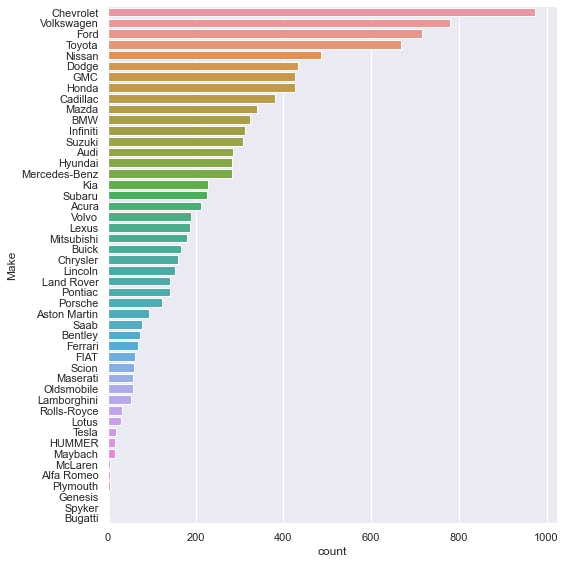

In [65]:
sb.catplot(y = 'Make', data = jointDF4, 
           kind = "count", 
           height = 8, 
           order = jointDF4['Make'].value_counts().index)

Original Data plot of MSRP against the make

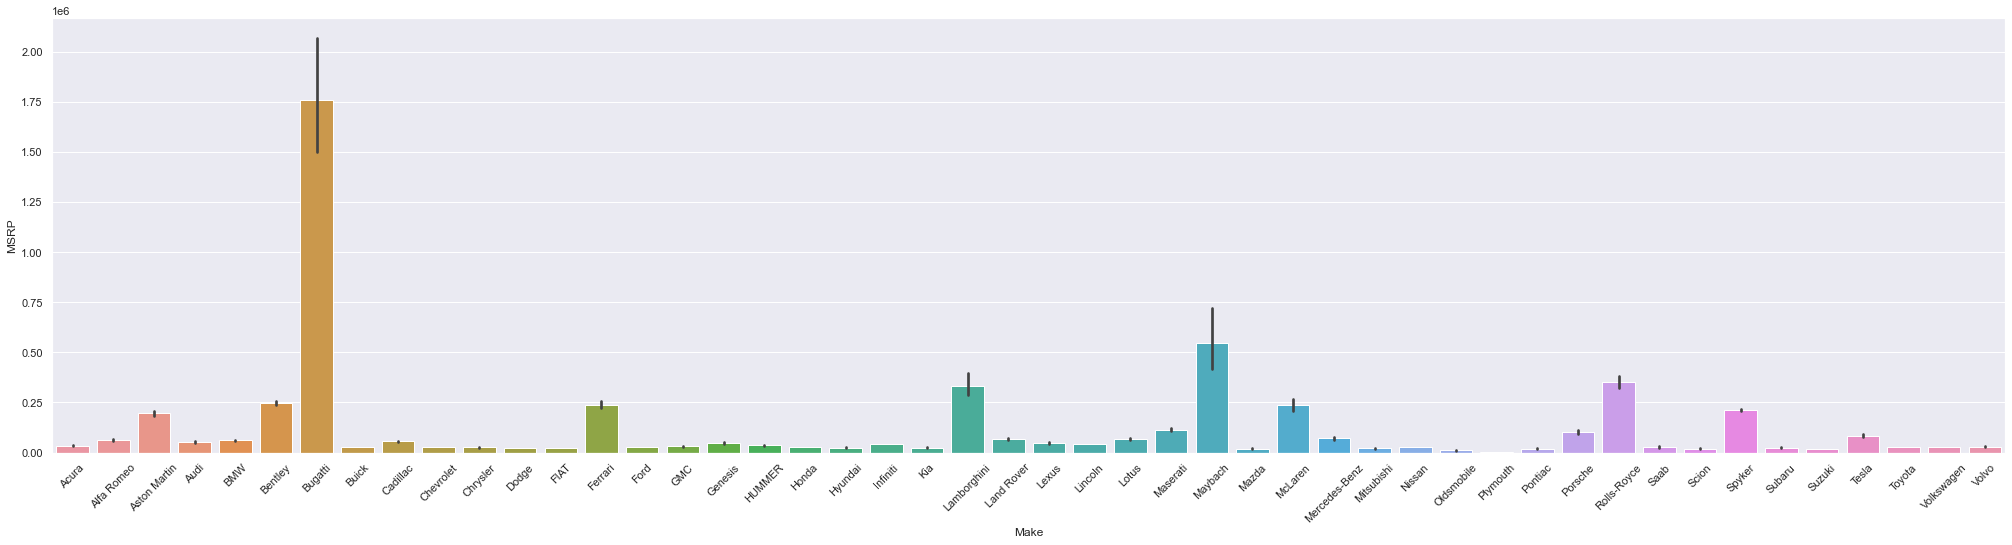

In [66]:
f = plt.figure(figsize=(35, 8))
sb.barplot(x = 'Make', y = 'MSRP', data = jointDF) 
           #order = jointDF.groupby('Make')['MSRP'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

Plot of MSRP against the Make after filtering out the data whose MSRP is 2000

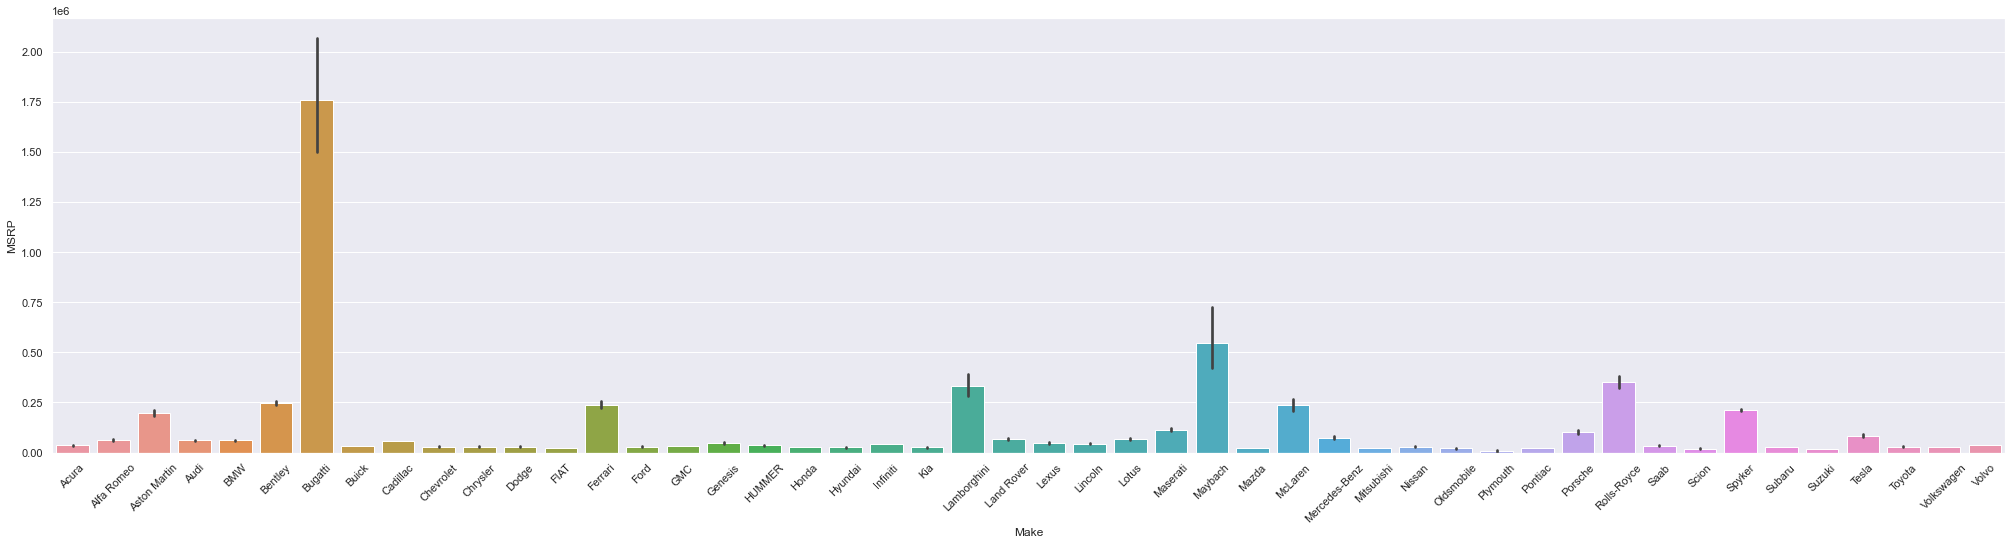

In [67]:
f = plt.figure(figsize=(35, 8))
sb.barplot(x = 'Make', y = 'MSRP', data = jointDF3) 
           #order = jointDF.groupby('Make')['MSRP'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

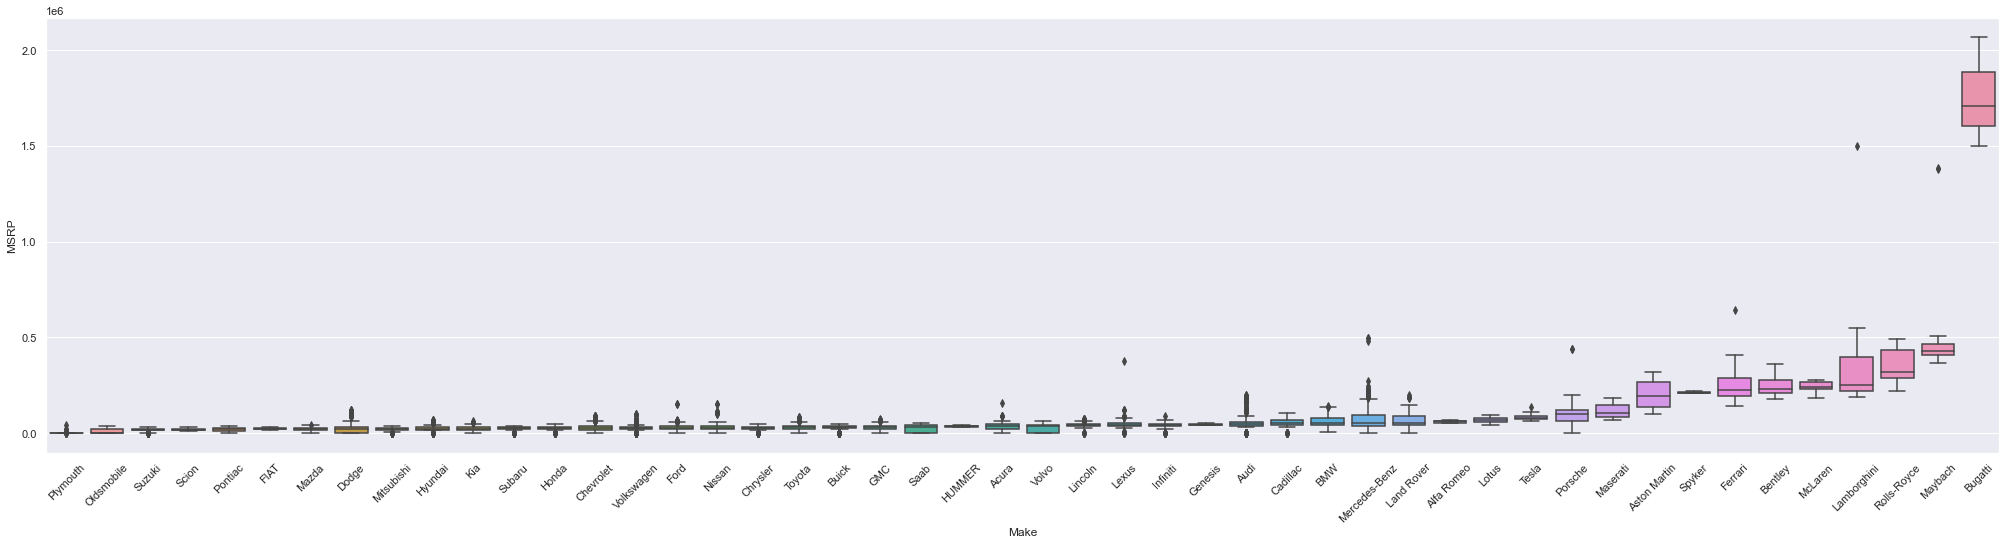

In [68]:
f = plt.figure(figsize=(35, 8))
sb.boxplot(x = 'Make', y = 'MSRP', data = jointDF, 
           order = jointDF.groupby('Make')['MSRP'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

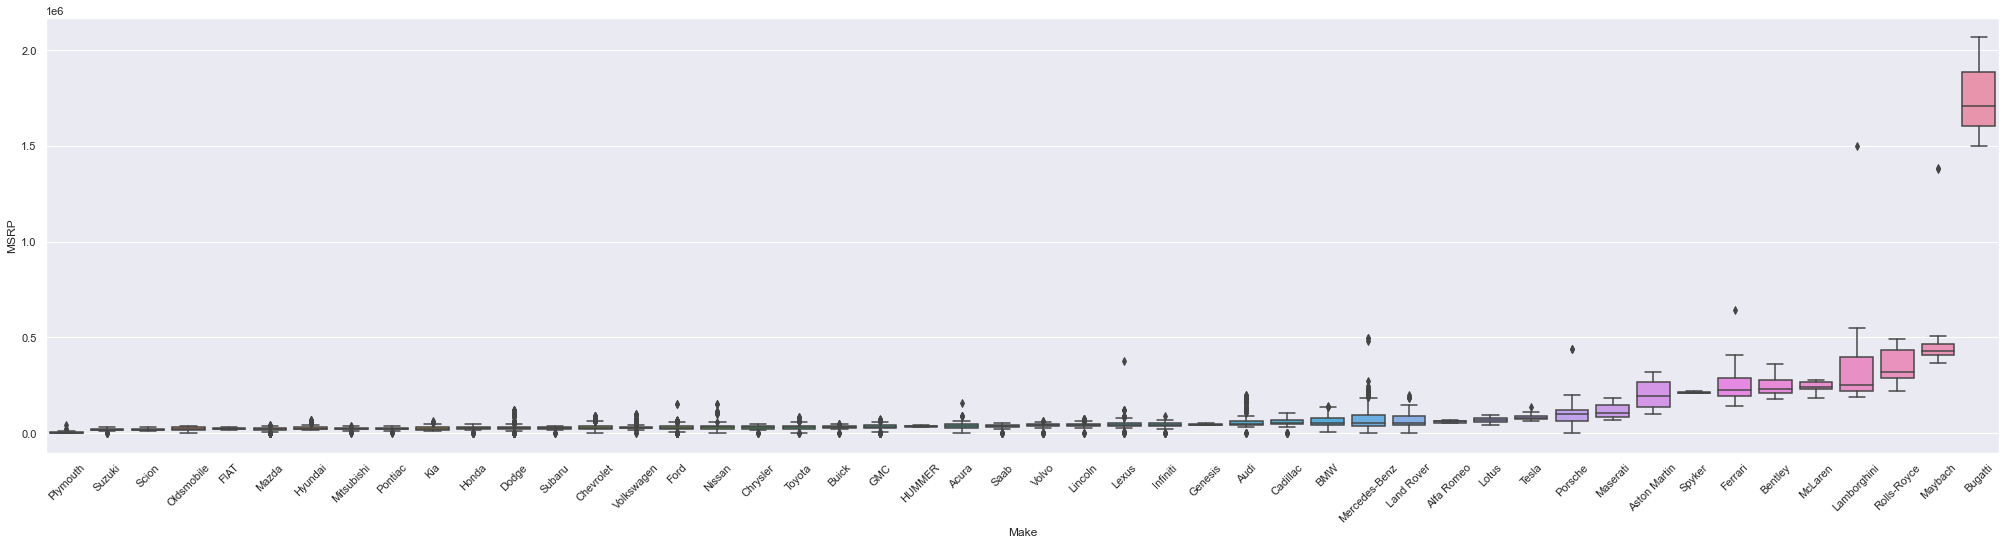

In [69]:
f = plt.figure(figsize=(35, 8))
sb.boxplot(x = 'Make', y = 'MSRP', data = jointDF3, 
           order = jointDF3.groupby('Make')['MSRP'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

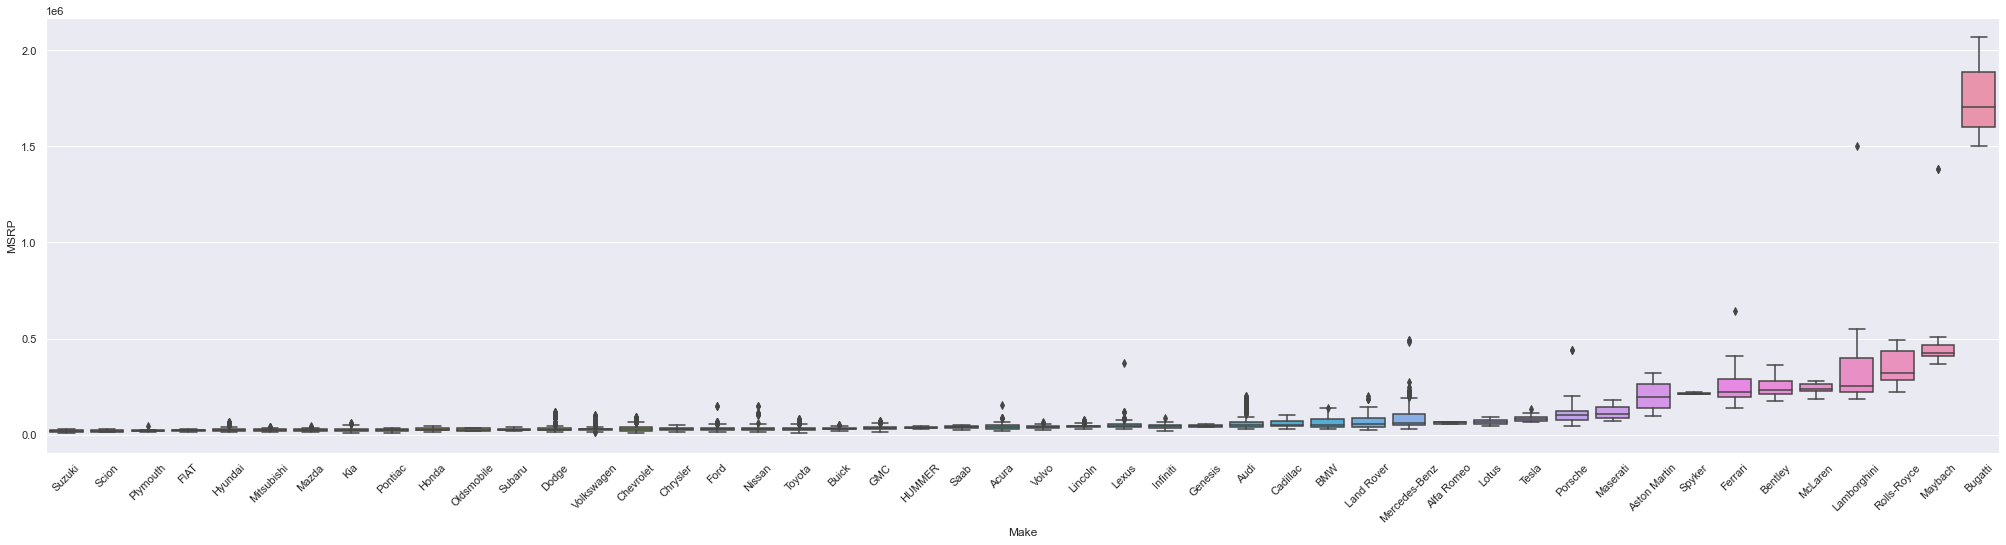

In [70]:
f = plt.figure(figsize=(35, 8))
sb.boxplot(x = 'Make', y = 'MSRP', data = jointDF4, 
           order = jointDF4.groupby('Make')['MSRP'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);

In [71]:
train_filterss.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11914.000000,11845.00000,11884.000000,11908.000000,11914.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,3.436093,26.637485,19.733255,1554.911197,4.059474e+04
std,7.579740,109.19187,1.780559,0.881315,8.863001,8.987798,1441.855347,6.010910e+04
min,1990.000000,55.00000,0.000000,2.000000,12.000000,7.000000,2.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,2.000000,22.000000,16.000000,549.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,4.000000,26.000000,18.000000,1385.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,4.000000,30.000000,22.000000,2009.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,4.000000,354.000000,137.000000,5657.000000,2.065902e+06


In [72]:
bugatti=train_filterss[train_filterss["Make"]=="Bugatti"]
bugatti.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,3.000000,3.0,3.0,3.0,3.0,3.0,3.0,3.000000e+00
mean,2008.333333,1001.0,16.0,2.0,14.0,8.0,820.0,1.757224e+06
std,0.577350,0.0,0.0,0.0,0.0,0.0,0.0,2.864384e+05
min,2008.000000,1001.0,16.0,2.0,14.0,8.0,820.0,1.500000e+06
25%,2008.000000,1001.0,16.0,2.0,14.0,8.0,820.0,1.602884e+06
50%,2008.000000,1001.0,16.0,2.0,14.0,8.0,820.0,1.705769e+06
75%,2008.500000,1001.0,16.0,2.0,14.0,8.0,820.0,1.885836e+06
max,2009.000000,1001.0,16.0,2.0,14.0,8.0,820.0,2.065902e+06


In [73]:
anomaly=train_filterss[train_filterss["Make"]=="Bugatti"]
train_filter_final=train_filterss.drop(anomaly.index)
train_filter_final.describe()

,Year,Engine HP,Engine Cylinders,Number of Doors,highway MPG,city mpg,Popularity,MSRP
count,11911.000000,11842.000000,11881.000000,11905.000000,11911.000000,11911.00000,11911.000000,1.191100e+04
mean,2010.384854,249.195660,5.626210,3.436455,26.640668,19.73621,1555.096298,4.016237e+04
std,7.580621,108.548246,1.773139,0.881131,8.861847,8.98700,1441.989746,5.345820e+04
min,1990.000000,55.000000,0.000000,2.000000,12.000000,7.00000,2.000000,2.000000e+03
25%,2007.000000,170.000000,4.000000,2.000000,22.000000,16.00000,549.000000,2.099950e+04
50%,2015.000000,227.000000,6.000000,4.000000,26.000000,18.00000,1385.000000,2.999500e+04
75%,2016.000000,300.000000,6.000000,4.000000,30.000000,22.00000,2009.000000,4.221000e+04
max,2017.000000,750.000000,12.000000,4.000000,354.000000,137.00000,5657.000000,1.500000e+06


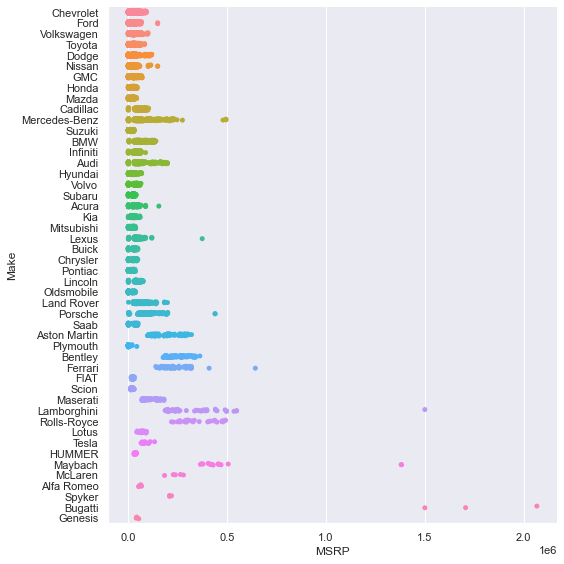

In [115]:
sb.catplot(y = 'Make', data = jointDF, 
           x="MSRP", 
           height = 8, 
           order = jointDF['Make'].value_counts().index)

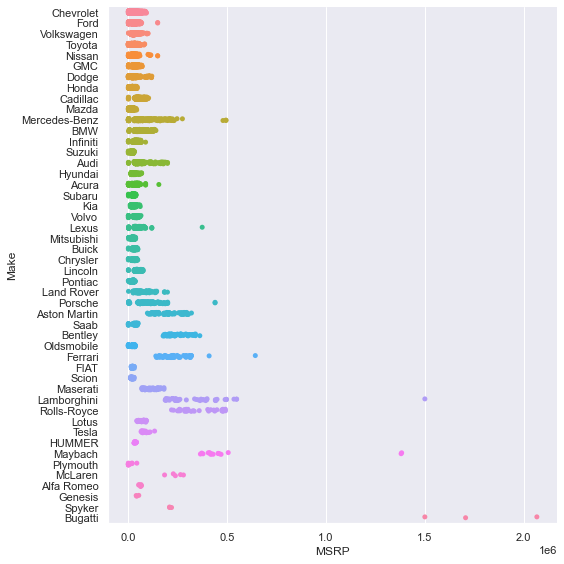

In [116]:
sb.catplot(y = 'Make', data = jointDF3, 
           x="MSRP", 
           height = 8, 
           order = jointDF3['Make'].value_counts().index)

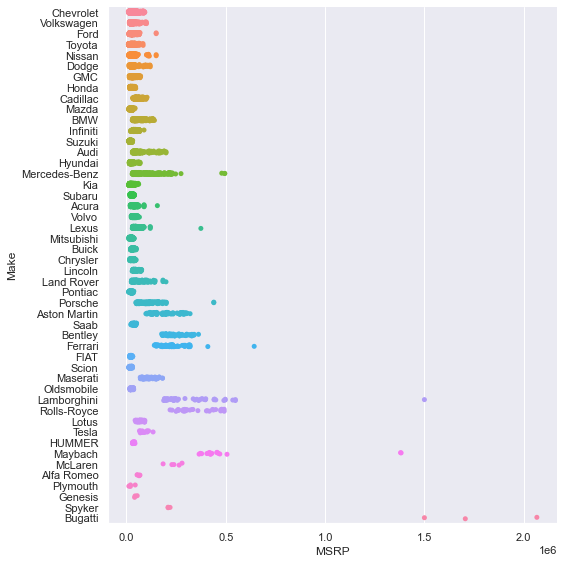

In [117]:
sb.catplot(y = 'Make', data = jointDF4, 
           x="MSRP", 
           height = 8, 
           order = jointDF4['Make'].value_counts().index)

filter out bugatti. Use the top 4 make to do a correlation with the msrp.

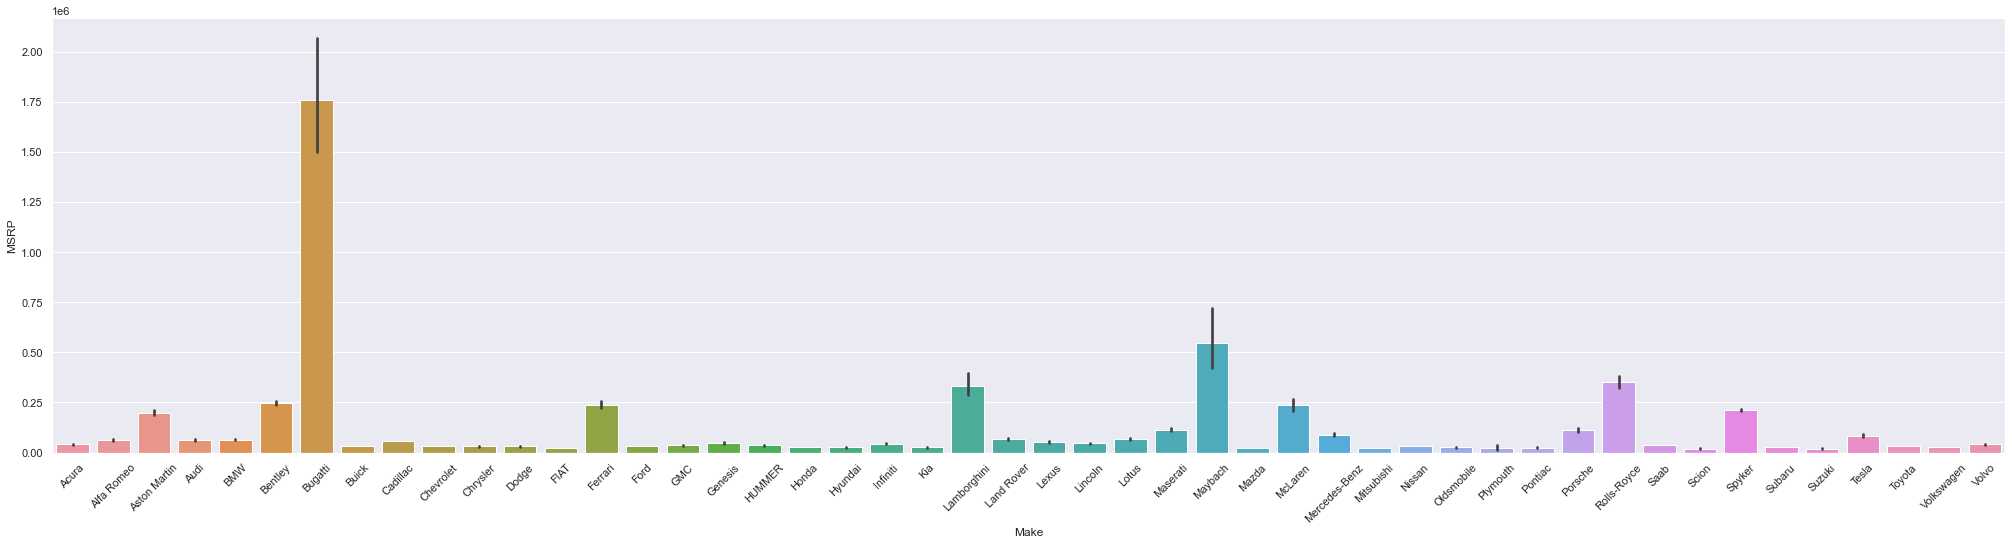

In [77]:
f = plt.figure(figsize=(35, 8))
sb.barplot(x = 'Make', y = 'MSRP', data = jointDF4) 
           #order = jointDF.groupby('Make')['MSRP'].median().sort_values().index)

# Tilt the x-axis labels for better readability
plt.xticks(rotation=45);


do filter_rule = (2000 == train_set["MSRP"])
filter_set = train_set[filter_rule]
then display
display year, make, msrp
replot rest of data
do random 80:20
which feature affect price most(boxplot, regression etc)


In [78]:
jointDF2 = pd.concat([msrp,year],axis = 1).reindex(msrp.index)
#jointDF2

In [79]:

 #sb.barplot(y = "Year", x = "MSRP", data = jointDF2)

In [80]:
mark =  pd.DataFrame(train["Market Category"])
train_filterss=train.drop(mark,axis=1)
#train_filterss

#df = pd.read_csv("newdata.csv",index_col=0)
#df = df.drop("Max",axis=0)

In [81]:
#make_filtered.describe()

In [82]:
#make_filtered2.describe()

In [83]:
#len(jointDF4["Make"].index)

(array([   0.,  500., 1000., 1500., 2000., 2500.]), [])

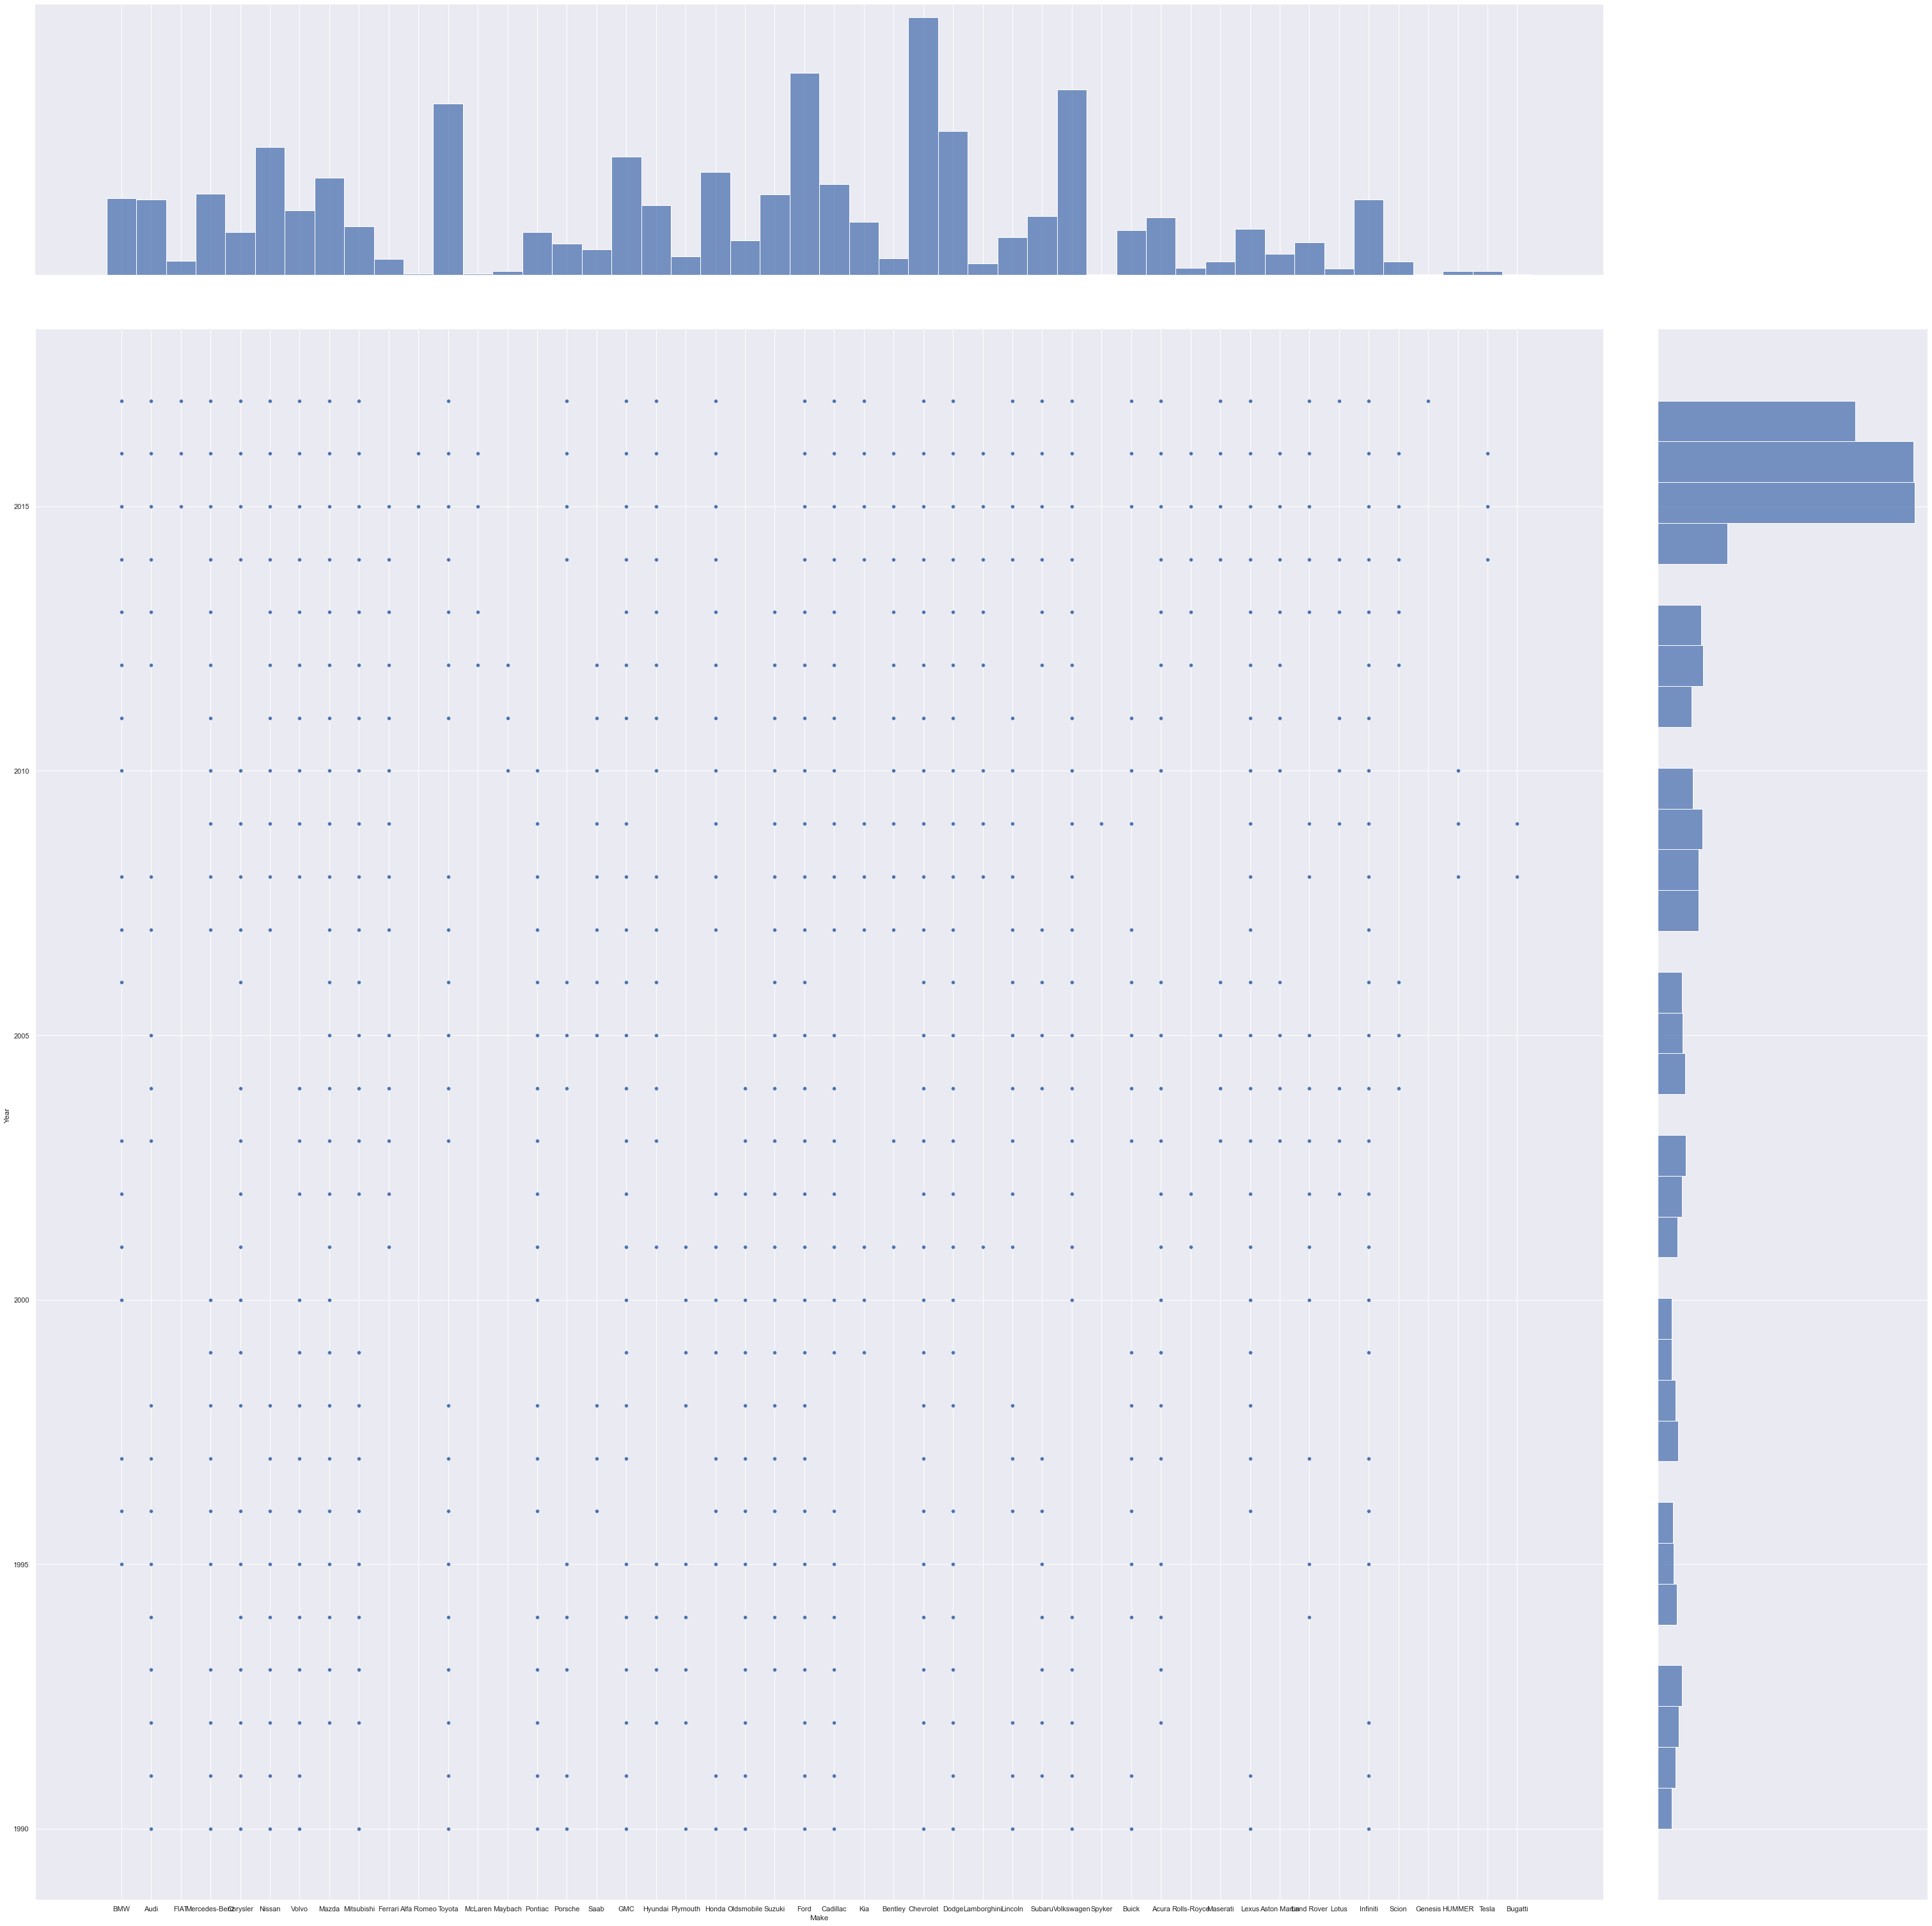

In [84]:
jointDF5 = pd.concat([year,make], axis = 1).reindex(year.index)
sb.jointplot(x = "Make", y = "Year", data = jointDF5, height =42)
plt.xticks(rotation=45)

In [85]:
chevrolet=train_filterss[train_filterss["Make"]=="Chevrolet"]
volkswagen=train_filterss[train_filterss["Make"]=="Volkswagen"]
ford=train_filterss[train_filterss["Make"]=="Ford"]
toyota=train_filterss[train_filterss["Make"]=="Toyota"]
nissan=train_filterss[train_filterss["Make"]=="Nissan"]

In [86]:
#chevrolet

In [87]:
#volkswagen

In [88]:
#ford

In [89]:
#toyota

In [90]:
#nissan

1)Plot the correlation matrix of the int features with respect to the individual top 4 brands
2)see the top feature with the highest correlation with respect to the top 4 brands
3)do a train test split; import the sci kit learn linear regression and train test split
4)split train:test 80:20
5) plot regression line

In [91]:
chevrolet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1123 entries, 1476 to 11267
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               1123 non-null   object 
 1   Model              1123 non-null   object 
 2   Year               1123 non-null   int64  
 3   Engine Fuel Type   1123 non-null   object 
 4   Engine HP          1117 non-null   float64
 5   Engine Cylinders   1121 non-null   float64
 6   Transmission Type  1123 non-null   object 
 7   Driven_Wheels      1123 non-null   object 
 8   Number of Doors    1123 non-null   float64
 9   Vehicle Size       1123 non-null   object 
 10  Vehicle Style      1123 non-null   object 
 11  highway MPG        1123 non-null   int64  
 12  city mpg           1123 non-null   int64  
 13  Popularity         1123 non-null   int64  
 14  MSRP               1123 non-null   int64  
dtypes: float64(3), int64(5), object(7)
memory usage: 140.4+ KB


In [92]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [93]:
chevrolet=chevrolet.dropna()
y = pd.DataFrame(chevrolet["MSRP"])
x = pd.DataFrame(chevrolet [["Year", "Engine HP", "highway MPG","city mpg"]])

In [94]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2)

In [95]:
trainDF = pd.concat([y_train, x_train], axis = 1).reindex(y_train.index)
#trainDF
trainDF.corr()

,MSRP,Year,Engine HP,highway MPG,city mpg
MSRP,1.000000,0.661938,0.843751,-0.105605,-0.114288
Year,0.661938,1.000000,0.379789,0.290109,0.194353
Engine HP,0.843751,0.379789,1.000000,-0.339358,-0.312526
highway MPG,-0.105605,0.290109,-0.339358,1.000000,0.947769
city mpg,-0.114288,0.194353,-0.312526,0.947769,1.000000


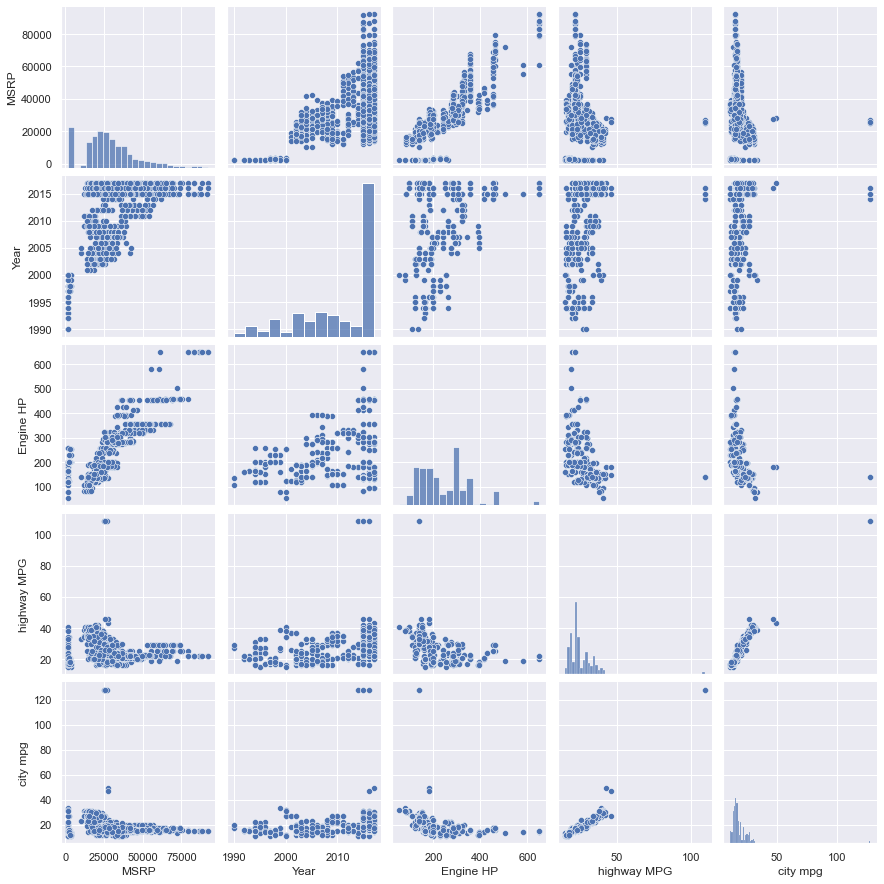

In [96]:
sb.pairplot(data = trainDF)

In [97]:
z= pd.DataFrame(chevrolet[["Engine Cylinders", "Number of Doors", "Popularity"]])
trainDF2 = pd.concat([y_train, z], axis = 1).reindex(y_train.index)
trainDF2.corr()

,MSRP,Engine Cylinders,Number of Doors,Popularity
MSRP,1.000000,0.519291,0.013928,NaN
Engine Cylinders,0.519291,1.000000,-0.155888,NaN
Number of Doors,0.013928,-0.155888,1.000000,NaN
Popularity,NaN,NaN,NaN,NaN


In [98]:
volks_y = pd.DataFrame(volkswagen["MSRP"])
volks_x = pd.DataFrame(volkswagen [["Year", "Engine HP", "highway MPG","city mpg"]])
volks_x_train, volks_x_test,volks_y_train, volks_y_test = train_test_split(volks_x, volks_y, test_size = 0.2)
volks_train = pd.concat([volks_y_train, volks_x_train], axis = 1).reindex(volks_y_train.index)
volks_z= pd.DataFrame(volkswagen[["Engine Cylinders", "Number of Doors", "Popularity"]])
volks_train.corr()

,MSRP,Year,Engine HP,highway MPG,city mpg
MSRP,1.000000,0.372273,0.809549,-0.105762,-0.070205
Year,0.372273,1.000000,0.316834,0.395737,0.251619
Engine HP,0.809549,0.316834,1.000000,-0.319992,-0.274030
highway MPG,-0.105762,0.395737,-0.319992,1.000000,0.929201
city mpg,-0.070205,0.251619,-0.274030,0.929201,1.000000


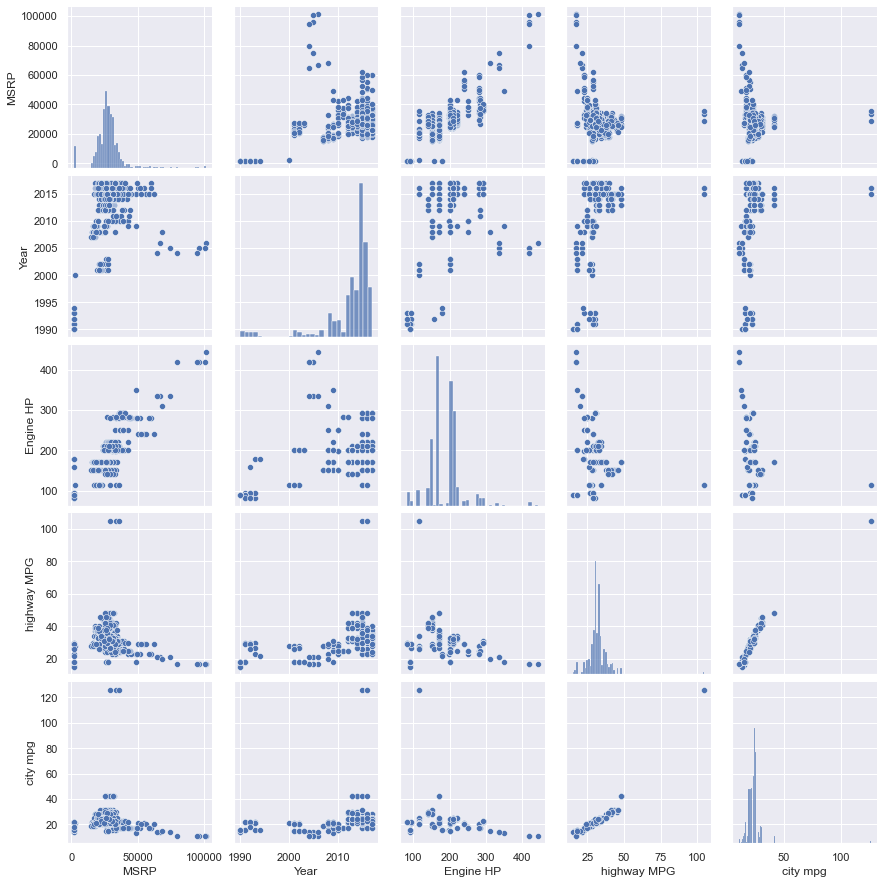

In [99]:
sb.pairplot(data = volks_train)

In [100]:
volks_train2 =  pd.concat([volks_y_train, volks_z], axis = 1).reindex(volks_y_train.index)
volks_train2.corr()

,MSRP,Engine Cylinders,Number of Doors,Popularity
MSRP,1.000000,0.606828,0.218614,NaN
Engine Cylinders,0.606828,1.000000,0.107092,NaN
Number of Doors,0.218614,0.107092,1.000000,NaN
Popularity,NaN,NaN,NaN,NaN


In [101]:
ford=ford.dropna()
ford_y = pd.DataFrame(ford["MSRP"])
ford_x = pd.DataFrame(ford [["Year", "Engine HP", "highway MPG","city mpg"]])
ford_x_train, ford_x_test,ford_y_train, ford_y_test = train_test_split(ford_x, ford_y, test_size = 0.2)
ford_train = pd.concat([ford_y_train, ford_x_train], axis = 1).reindex(ford_y_train.index)
ford_z= pd.DataFrame(ford[["Engine Cylinders", "Number of Doors", "Popularity"]])
ford_train2 =  pd.concat([ford_y_train, ford_z], axis = 1).reindex(ford_y_train.index)
ford_train.corr()

,MSRP,Year,Engine HP,highway MPG,city mpg
MSRP,1.000000,0.745366,0.751186,-0.053470,-0.063040
Year,0.745366,1.000000,0.506369,0.271214,0.217872
Engine HP,0.751186,0.506369,1.000000,-0.318342,-0.355229
highway MPG,-0.053470,0.271214,-0.318342,1.000000,0.898124
city mpg,-0.063040,0.217872,-0.355229,0.898124,1.000000


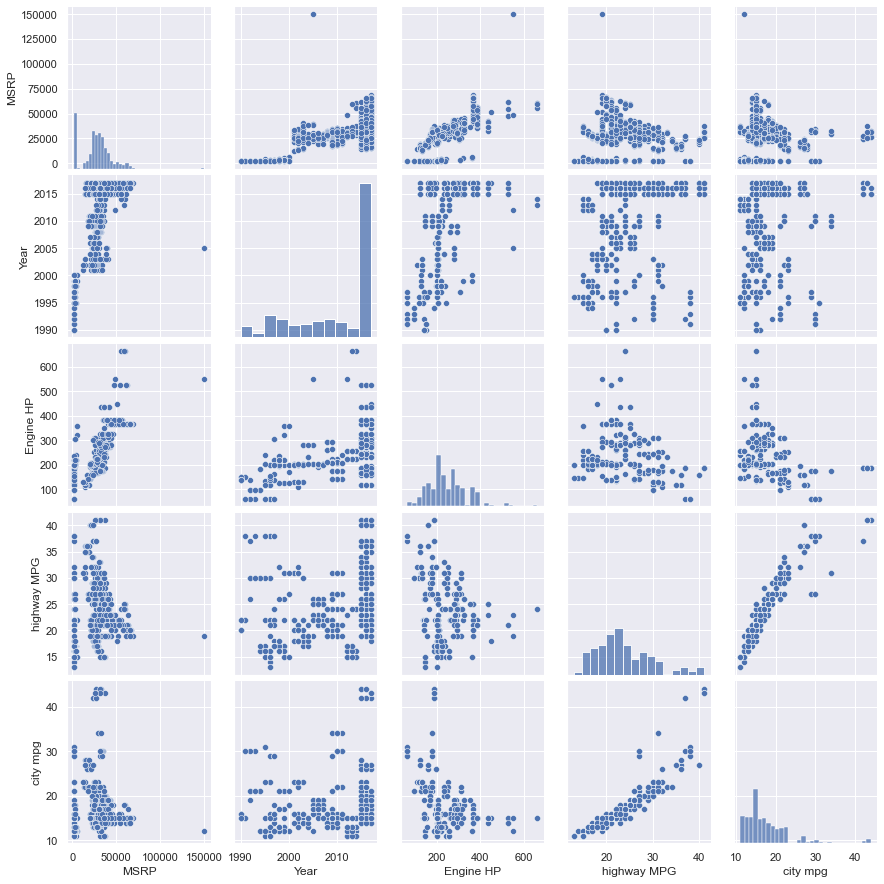

In [102]:
sb.pairplot(data = ford_train)

In [103]:
ford_train2.corr()

,MSRP,Engine Cylinders,Number of Doors,Popularity
MSRP,1.000000,0.096201,0.299320,NaN
Engine Cylinders,0.096201,1.000000,-0.227115,NaN
Number of Doors,0.299320,-0.227115,1.000000,NaN
Popularity,NaN,NaN,NaN,NaN


In [104]:
toyota=toyota.dropna()
toyota_y = pd.DataFrame(toyota["MSRP"])
toyota_x = pd.DataFrame(toyota [["Year", "Engine HP", "highway MPG","city mpg"]])
toyota_x_train, toyota_x_test,toyota_y_train, toyota_y_test = train_test_split(toyota_x, toyota_y, test_size = 0.2)
toyota_train = pd.concat([toyota_y_train, toyota_x_train], axis = 1).reindex(toyota_y_train.index)
toyota_z= pd.DataFrame(toyota[["Engine Cylinders", "Number of Doors", "Popularity"]])
toyota_train2 =  pd.concat([toyota_y_train, toyota_z], axis = 1).reindex(toyota_y_train.index)
toyota_train.corr()

,MSRP,Year,Engine HP,highway MPG,city mpg
MSRP,1.000000,0.724870,0.733333,-0.292177,-0.228173
Year,0.724870,1.000000,0.409229,0.095282,0.122126
Engine HP,0.733333,0.409229,1.000000,-0.724010,-0.641272
highway MPG,-0.292177,0.095282,-0.724010,1.000000,0.938680
city mpg,-0.228173,0.122126,-0.641272,0.938680,1.000000


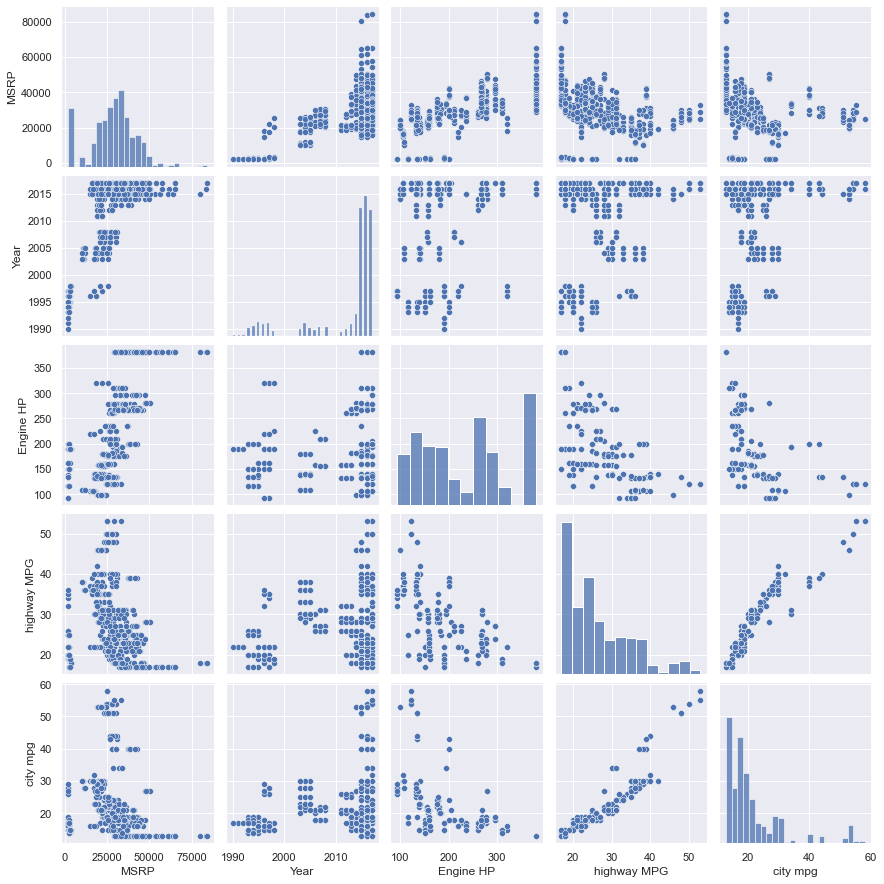

In [105]:
sb.pairplot(data = toyota_train)

In [106]:
toyota_train2.corr()

,MSRP,Engine Cylinders,Number of Doors,Popularity
MSRP,1.000000,0.607343,0.560384,NaN
Engine Cylinders,0.607343,1.000000,0.225745,NaN
Number of Doors,0.560384,0.225745,1.000000,NaN
Popularity,NaN,NaN,NaN,NaN


In [107]:
nissan=nissan.dropna()
nissan_y = pd.DataFrame(nissan["MSRP"])
nissan_x = pd.DataFrame(nissan [["Year", "Engine HP", "highway MPG","city mpg"]])


In [108]:
nissan_x_train, nissan_x_test,nissan_y_train, nissan_y_test = train_test_split(nissan_x, nissan_y, test_size = 0.2)
nissan_train = pd.concat([nissan_y_train, nissan_x_train], axis = 1).reindex(nissan_y_train.index)
nissan_z= pd.DataFrame(nissan[["Engine Cylinders", "Number of Doors", "Popularity"]])
nissan_train2 =  pd.concat([nissan_y_train, nissan_z], axis = 1).reindex(nissan_y_train.index)
nissan_train.corr()

,MSRP,Year,Engine HP,highway MPG,city mpg
MSRP,1.000000,0.584012,0.832928,-0.254478,-0.312222
Year,0.584012,1.000000,0.337150,0.176457,0.147697
Engine HP,0.832928,0.337150,1.000000,-0.549312,-0.635317
highway MPG,-0.254478,0.176457,-0.549312,1.000000,0.953391
city mpg,-0.312222,0.147697,-0.635317,0.953391,1.000000


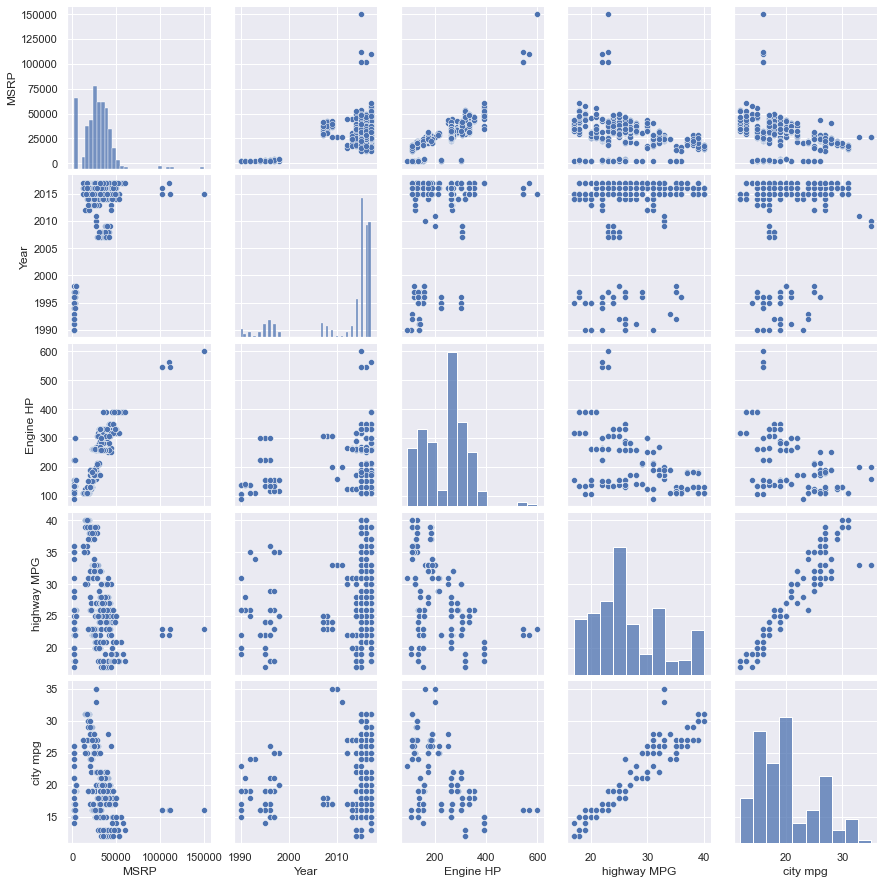

In [109]:
sb.pairplot(data = nissan_train)

In [110]:
nissan_train2.corr()

,MSRP,Engine Cylinders,Number of Doors,Popularity
MSRP,1.000000,0.576538,0.009169,NaN
Engine Cylinders,0.576538,1.000000,-0.008822,NaN
Number of Doors,0.009169,-0.008822,1.000000,NaN
Popularity,NaN,NaN,NaN,NaN


In [111]:
def mean_sq_err(actual,predicted):
    '''Returns the Mean Squared Error of actual and predicted values'''
    return np.mean(np.square(np.array(actual) -np.array(predicted)))

In [112]:
linreg = LinearRegression()  # create the linear regression object
linreg.fit(volks_x_train,volks_y_train)  # train the linear regression model
# Coefficients of the Linear Regression Line
print("Intercept of Regression \t: b = ",linreg.intercept_)
print("Coefficients of Regression \t: a =",linreg.coef_)
print(pd.DataFrame(list(zip(volks_x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Total values corresponding to HP
volks_y_train_pred = linreg.predict(volks_x_train)
volks_y_test_pred = linreg.predict(volks_x_test)

# Check the Goodness of Fit on train data
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance(train) (R^2) \t:",linreg.score(volks_x_train,volks_y_train))
print("Mean Squared Error (MSE) \t:",mean_squared_error(volks_y_train,volks_y_train_pred))
print("Explained Variance(test),prediction accuracy (R^2) \t:",100*linreg.score(GrLiv_test,Saleprice_test)) 
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction accuracy \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(volks_x_test,volks_ y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(volks_y_test, volks_y_test_pred))
print()

# Plot the Predictions vs the True Values
f, axes = plt.subplots(1,2, figsize=(24,12))
axes[0].scatter(volks_y_train,volks_y_train_pred,color = 'b')
axes[0].plot(volks_y_train,volks_y_train,'w-',linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable(Train)")
axes[0].set_ylabel("Predicted values of the Response variable (Train)")
axes[1].scatter(volks_y_test,volks_y_test_pred,color="g")
axes[1].plot(volks_y_test,volks_y_test,'w-',linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable(Test)")
axes[1].set_ylabel("Predicted values of the Response Variable(Test)")
plt.show()

Intercept of Regression 	: b =  [-318336.32806607]
Coefficients of Regression 	: a = [[151.87594734 191.99421811  10.406107   169.87746525]]
    Predictors  Coefficients
0         Year    151.875947
1    Engine HP    191.994218
2  highway MPG     10.406107
3     city mpg    169.877465

Goodness of Fit of Model 	Train Dataset
Explained Variance(train) (R^2) 	: 0.6849205690431448


NameError: name 'y_train_pred' is not defined

In [ ]:
linreg = LinearRegression()  # create the linear regression object
linreg.fit(ford_x_train,ford_y_train)  # train the linear regression model
# Coefficients of the Linear Regression Line
print("Intercept of Regression \t: b = ",linreg.intercept_)
print("Coefficients of Regression \t: a =",linreg.coef_)
print(pd.DataFrame(list(zip(ford_x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Total values corresponding to HP
ford_y_train_pred = linreg.predict(ford_x_train)
ford_y_test_pred = linreg.predict(ford_x_test)

# Check the Goodness of Fit on train data
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance(train) (R^2) \t:",linreg.score(ford_x_train,ford_y_train))
print("Mean Squared Error (MSE) \t:",mean_squared_error(ford_y_train,ford_y_train_pred))
print("Explained Variance(test),prediction accuracy (R^2) \t:",100*linreg.score(ford_x_test,ford_y_test)) 
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction accuracy \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(ford_x_test, ford_y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(ford_y_test, ford_y_test_pred))
print()

# Plot the Predictions vs the True Values
f, axes = plt.subplots(1,2, figsize=(24,12))
axes[0].scatter(ford_y_train,ford_y_train_pred,color = 'b')
axes[0].plot(ford_y_train,ford_y_train,'w-',linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable(Train)")
axes[0].set_ylabel("Predicted values of the Response variable (Train)")
axes[1].scatter(ford_y_test,ford_y_test_pred,color="g")
axes[1].plot(ford_y_test,ford_y_test,'w-',linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable(Test)")
axes[1].set_ylabel("Predicted values of the Response Variable(Test)")
plt.show()

In [ ]:
linreg = LinearRegression()  # create the linear regression object
linreg.fit(toyota_x_train,toyota_y_train)  # train the linear regression model
# Coefficients of the Linear Regression Line
print("Intercept of Regression \t: b = ",linreg.intercept_)
print("Coefficients of Regression \t: a =",linreg.coef_)
print(pd.DataFrame(list(zip(toyota_x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Total values corresponding to HP
toyota_y_train_pred = linreg.predict(toyota_x_train)
toyota_y_test_pred = linreg.predict(toyota_x_test)

# Check the Goodness of Fit on train data
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance(train) (R^2) \t:",linreg.score(toyota_x_train,toyota_y_train))
print("Mean Squared Error (MSE) \t:",mean_squared_error(toyota_y_train,toyota_y_train_pred))
print("Explained Variance(test),prediction accuracy (R^2) \t:",100*linreg.score(toyota_x_test,toyota_y_test)) 
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction accuracy \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(toyota_x_test, toyota_y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(toyota_y_test, toyota_y_test_pred))
print()

# Plot the Predictions vs the True Values
f, axes = plt.subplots(1,2, figsize=(24,12))
axes[0].scatter(toyota_y_train,toyota_y_train_pred,color = 'b')
axes[0].plot(toyota_y_train,toyota_y_train,'w-',linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable(Train)")
axes[0].set_ylabel("Predicted values of the Response variable (Train)")
axes[1].scatter(toyota_y_test,toyota_y_test_pred,color="g")
axes[1].plot(toyota_y_test,toyota_y_test,'w-',linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable(Test)")
axes[1].set_ylabel("Predicted values of the Response Variable(Test)")
plt.show()

In [ ]:
linreg = LinearRegression()  # create the linear regression object
linreg.fit(nissan_x_train,nissan_y_train)  # train the linear regression model
# Coefficients of the Linear Regression Line
print("Intercept of Regression \t: b = ",linreg.intercept_)
print("Coefficients of Regression \t: a =",linreg.coef_)
print(pd.DataFrame(list(zip(nissan_x_train.columns, linreg.coef_[0])), columns = ["Predictors", "Coefficients"]))
print()

# Predict Total values corresponding to HP
nissan_y_train_pred = linreg.predict(nissan_x_train)
nissan_y_test_pred = linreg.predict(nissan_x_test)

# Check the Goodness of Fit on train data
print("Goodness of Fit of Model \tTrain Dataset")
print("Explained Variance(train) (R^2) \t:",linreg.score(nissan_x_train,nissan_y_train))
print("Mean Squared Error (MSE) \t:",mean_squared_error(nissan_y_train,nissan_y_train_pred))
print("Explained Variance(test),prediction accuracy (R^2) \t:",100*linreg.score(nissan_x_test,nissan_y_test)) 
print()
# Check the Goodness of Fit (on Test Data)
print("Prediction accuracy \tTest Dataset")
print("Explained Variance (R^2) \t:", linreg.score(nissan_x_test, nissan_y_test))
print("Mean Squared Error (MSE) \t:", mean_squared_error(nissan_y_test, nissan_y_test_pred))
print()

# Plot the Predictions vs the True Values
f, axes = plt.subplots(1,2, figsize=(24,12))
axes[0].scatter(nissan_y_train,nissan_y_train_pred,color = 'b')
axes[0].plot(nissan_y_train,nissan_y_train,'w-',linewidth = 1)
axes[0].set_xlabel("True values of the Response Variable(Train)")
axes[0].set_ylabel("Predicted values of the Response variable (Train)")
axes[1].scatter(nissan_y_test,nissan_y_test_pred,color="g")
axes[1].plot(nissan_y_test,nissan_y_test,'w-',linewidth = 1)
axes[1].set_xlabel("True values of the Response Variable(Test)")
axes[1].set_ylabel("Predicted values of the Response Variable(Test)")
plt.show()

In [ ]:
#total = pd.concat([automatic,manual],axis = 0)
#license=pd.concat([msrp,total],axis = 1).reindex(msrp.index)
#f = plt.figure(figsize=(16, 8))
#sb.stripplot(x = 'MSRP', y = 'Transmission Type', data = license)

In [ ]:
#from sklearn.tree import DecisionTreeClassifier
#tree = DecisionTreeClassifier(max_depth = 4)

In [ ]:
#license=license.dropna()
#licenses = pd.DataFrame(license['Transmission Type'])
#Msrp = pd.DataFrame(license['MSRP'])


# Split the Dataset into random Train and Test
#licenses_train, licenses_test, Msrp_train, Msrp_test = train_test_split(licenses, Msrp, test_size = 0.2)

In [ ]:
#tree.fit(Msrp_train, licenses_train)
#from sklearn.tree import plot_tree

#f = plt.figure(figsize=(24,24))
#plot_tree(tree, filled=True,  
 #         feature_names=Msrp_train.columns, 
 #         class_names=["manual","automatic"])

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

# Recall the Legendary-Total Dataset
legnd = pd.DataFrame(pkmndata['Legendary'])   # Response
total = pd.DataFrame(pkmndata['Total'])       # Predictor

# Split the Legendary-Total Dataset into Train and Test
X_train, X_test, y_train, y_test = train_test_split(total, legnd, test_size = 0.25)

# Decision Tree using Train Data
dectree = DecisionTreeClassifier(max_depth = 2)  # create the decision tree object
dectree.fit(X_train, y_train)                    # train the decision tree model

# Predict Legendary values corresponding to Total
y_train_pred = dectree.predict(X_train)
y_test_pred = dectree.predict(X_test)

# Check the Goodness of Fit (on Train Data)
print("Goodness of Fit of Model \tTrain Dataset")
print("Classification Accuracy \t:", dectree.score(X_train, y_train))
print()

# Check the Goodness of Fit (on Test Data)
print("Goodness of Fit of Model \tTest Dataset")
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print()

# Plot the Confusion Matrix for Train and Test
f, axes = plt.subplots(1, 2, figsize=(12, 4))
sb.heatmap(confusion_matrix(y_train, y_train_pred),
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
sb.heatmap(confusion_matrix(y_test, y_test_pred), 
           annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])